In [16]:
import os
import json

import numpy as np
import matplotlib.pyplot as plt

In [22]:
folder_path = r"C:\Users\Johnk\Documents\PhD\Quantum Computing Code\Quantum-Computing\SUSY\SUSY QM\PennyLane\VQE\OptimizerComparison"
folders = [f for f in os.listdir(folder_path) if os.path.isdir(os.path.join(folder_path, f))]
folders

['COBYLA',
 'Differential Evolution',
 'Differential Evolution Tuned',
 'Differential Evolution+L-BFGS-B',
 'L-BFGS-B']

In [25]:
data = {}
shots = 'None'
for folder in folders:
    d_path = os.path.join(folder_path, folder, 'DW', shots, 'DW_16.json')
    
    with open(d_path, 'r') as json_file:
        data[folder] = json.load(json_file)

# Convergence Plot

Saving plot for COBYLA
Saving plot for Differential Evolution
Saving plot for Differential Evolution Tuned
Saving plot for Differential Evolution+L-BFGS-B
Saving plot for L-BFGS-B


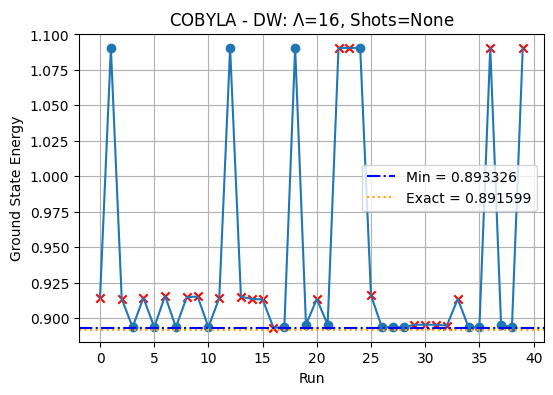

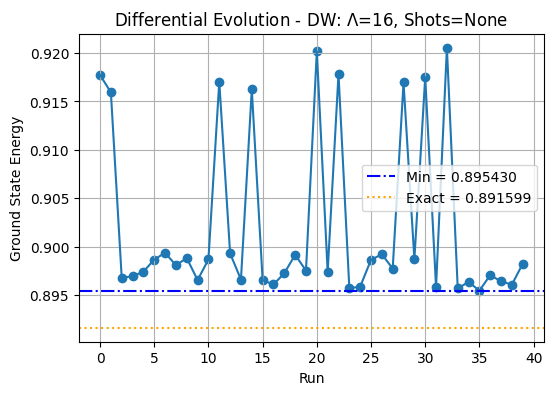

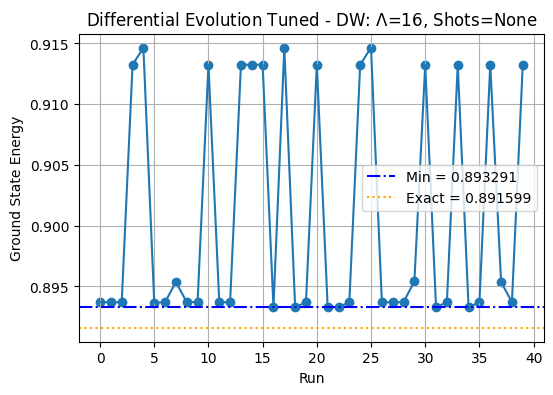

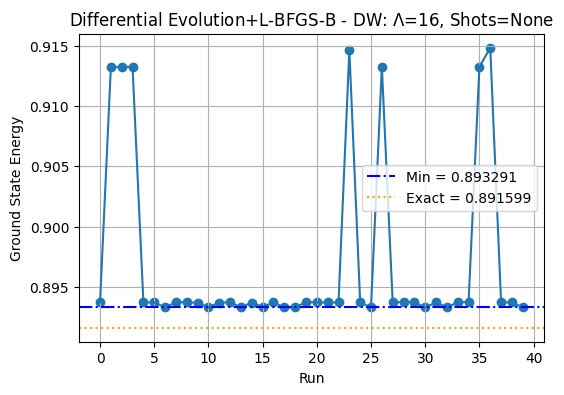

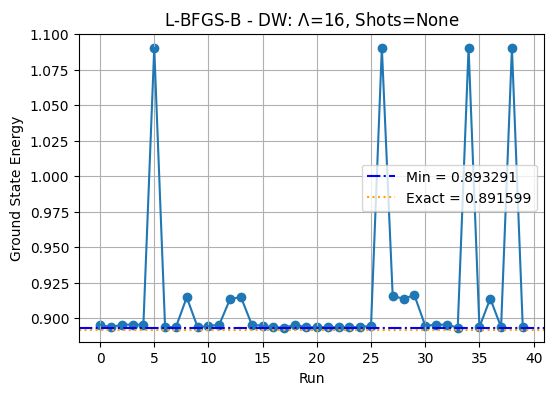

In [26]:
for folder in folders:

    # Save plot
    print(f"Saving plot for {folder}")

    op_data = data[folder]
    results = np.array(op_data['results'])
    exact = np.min(op_data['exact_eigenvalues'])
    x_values = np.arange(len(results))

    converged = np.array(op_data['success'])

    # Calculating statistics
    min_value = np.min(results)

    plt.figure(figsize=(6,4))
    plt.plot(x_values, results)#, label='Energy Results')

    # Plot converged plots
    plt.scatter(x_values[converged], results[converged], marker='o')#, label='Converged')

    # Plot non-converged points
    plt.scatter(x_values[~converged], results[~converged], marker='x', color='r')#, label='Not Converged')

    # Plotmin and exact lines
    plt.axhline(y=min_value, color='b', linestyle='-.', label=f'Min = {min_value:.6f}')
    plt.axhline(y=exact, color='orange', linestyle=':', label=f'Exact = {exact:.6f}')

    plt.xlabel('Run')
    plt.ylabel('Ground State Energy')
    plt.title(f"{folder} - DW: $\\Lambda$=16, Shots={shots}")
    plt.legend()
    plt.grid(True)
    #plt.show()
    save_path = os.path.join(folder_path, folder, 'DW', shots, 'convergence_plot.png')
    plt.savefig(save_path, bbox_inches='tight')

# Energy Comparison Plot

Saving plot for COBYLA
Saving plot for DifferentialEvolutionTuned
Saving plot for DifferentialEvolutionTuned-NoPolish
Saving plot for DifferentialEvolutionUntuned
Saving plot for L-BFGS-B


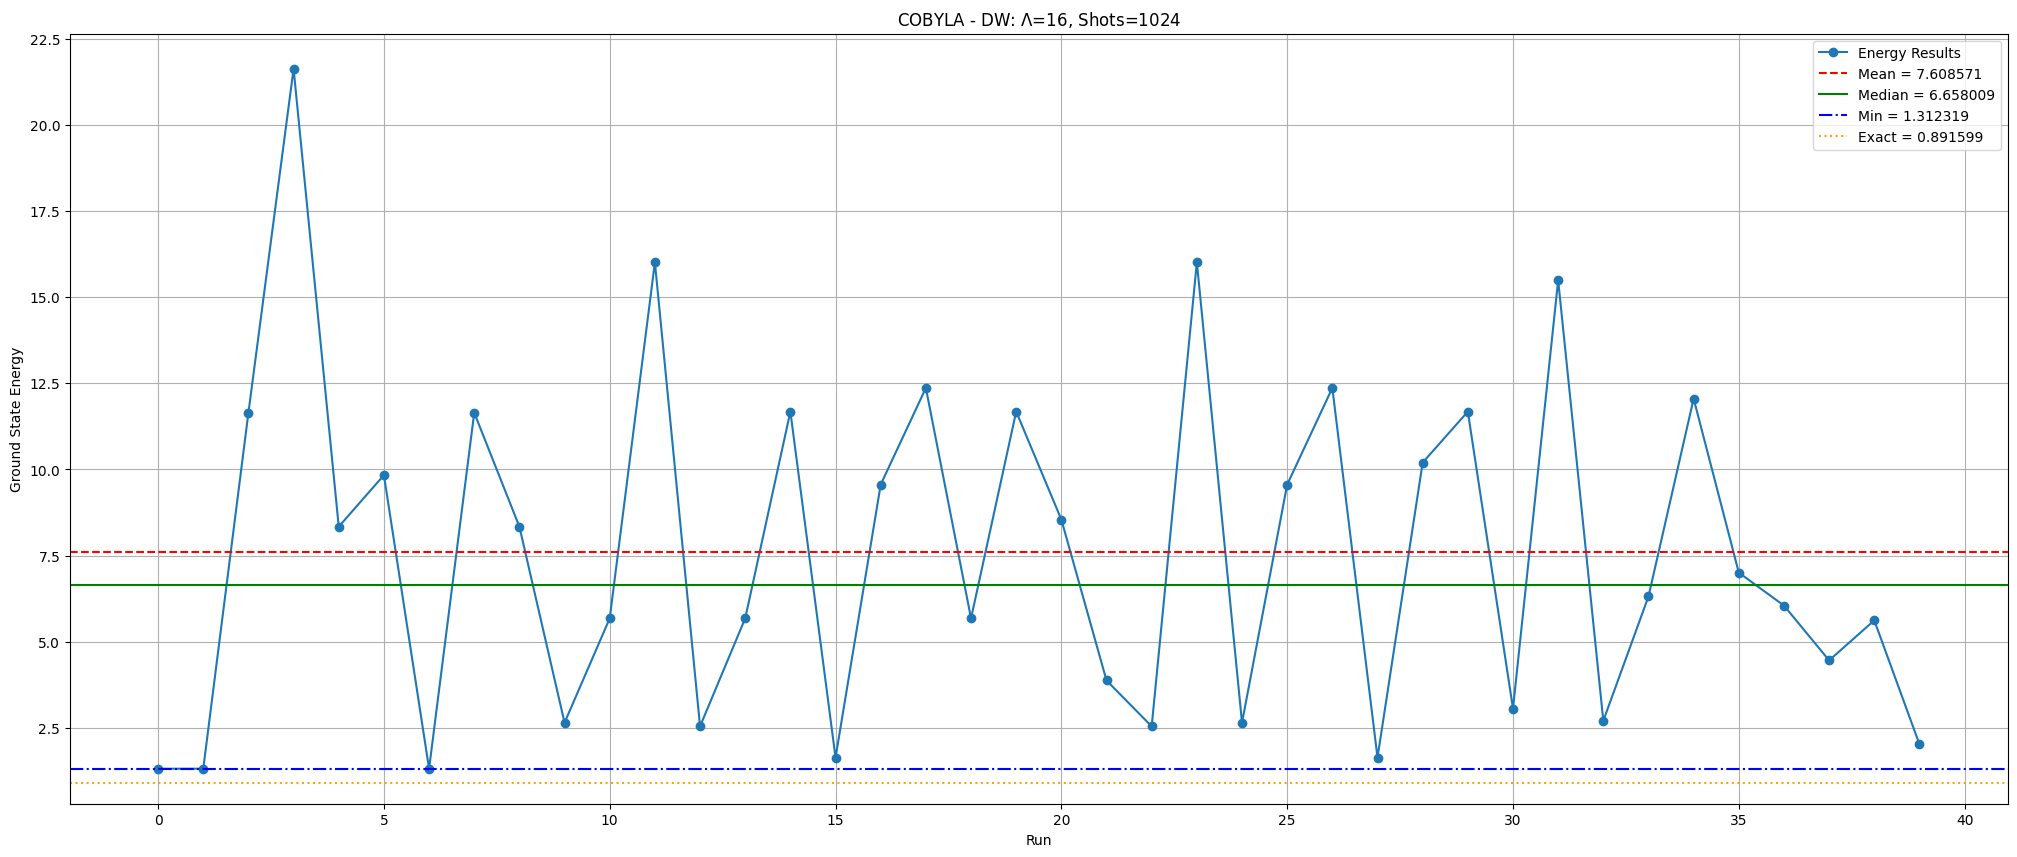

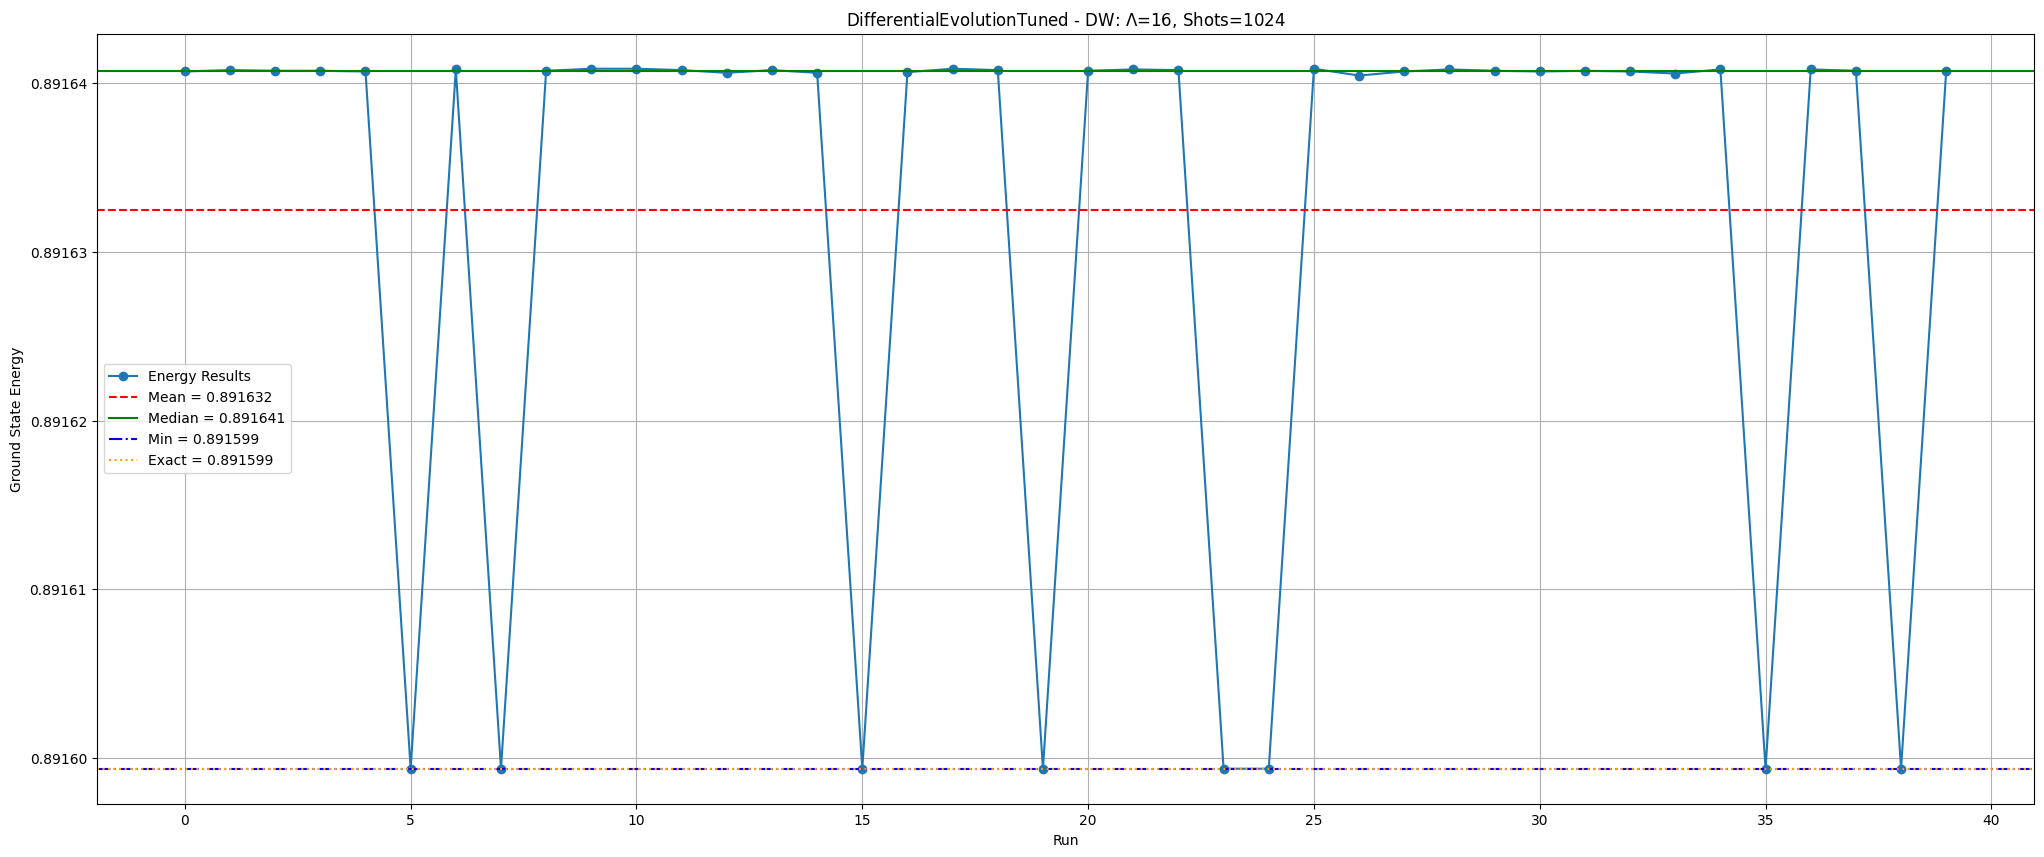

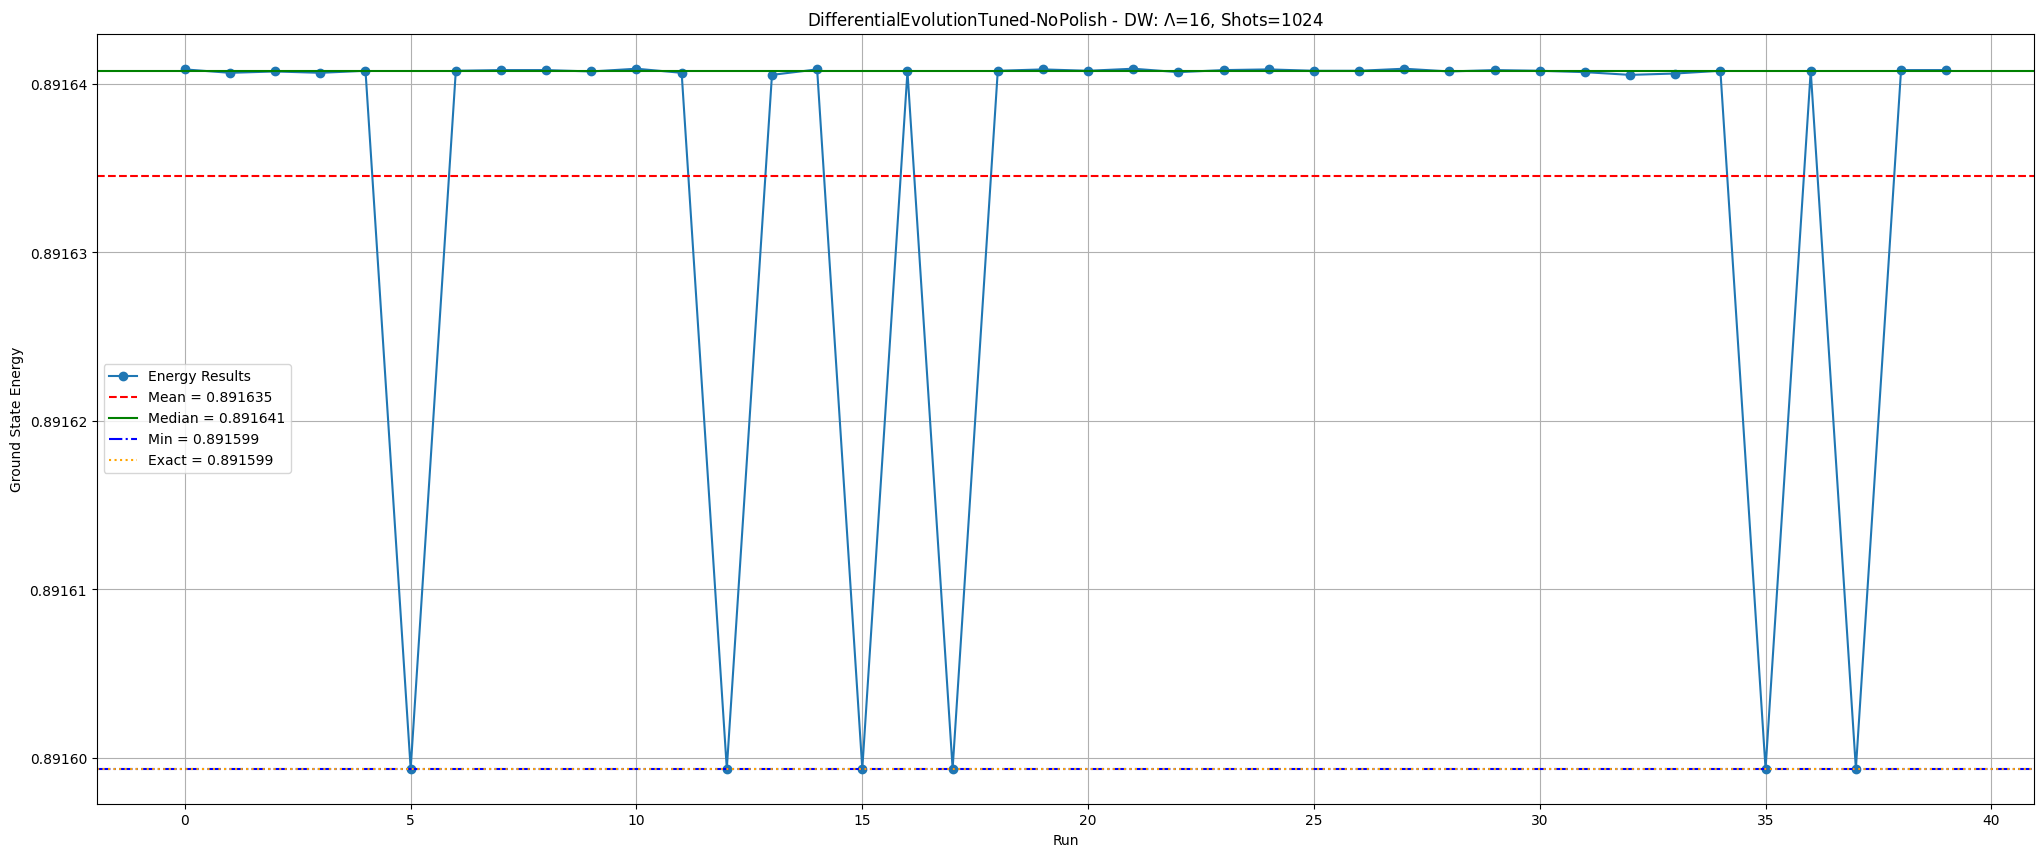

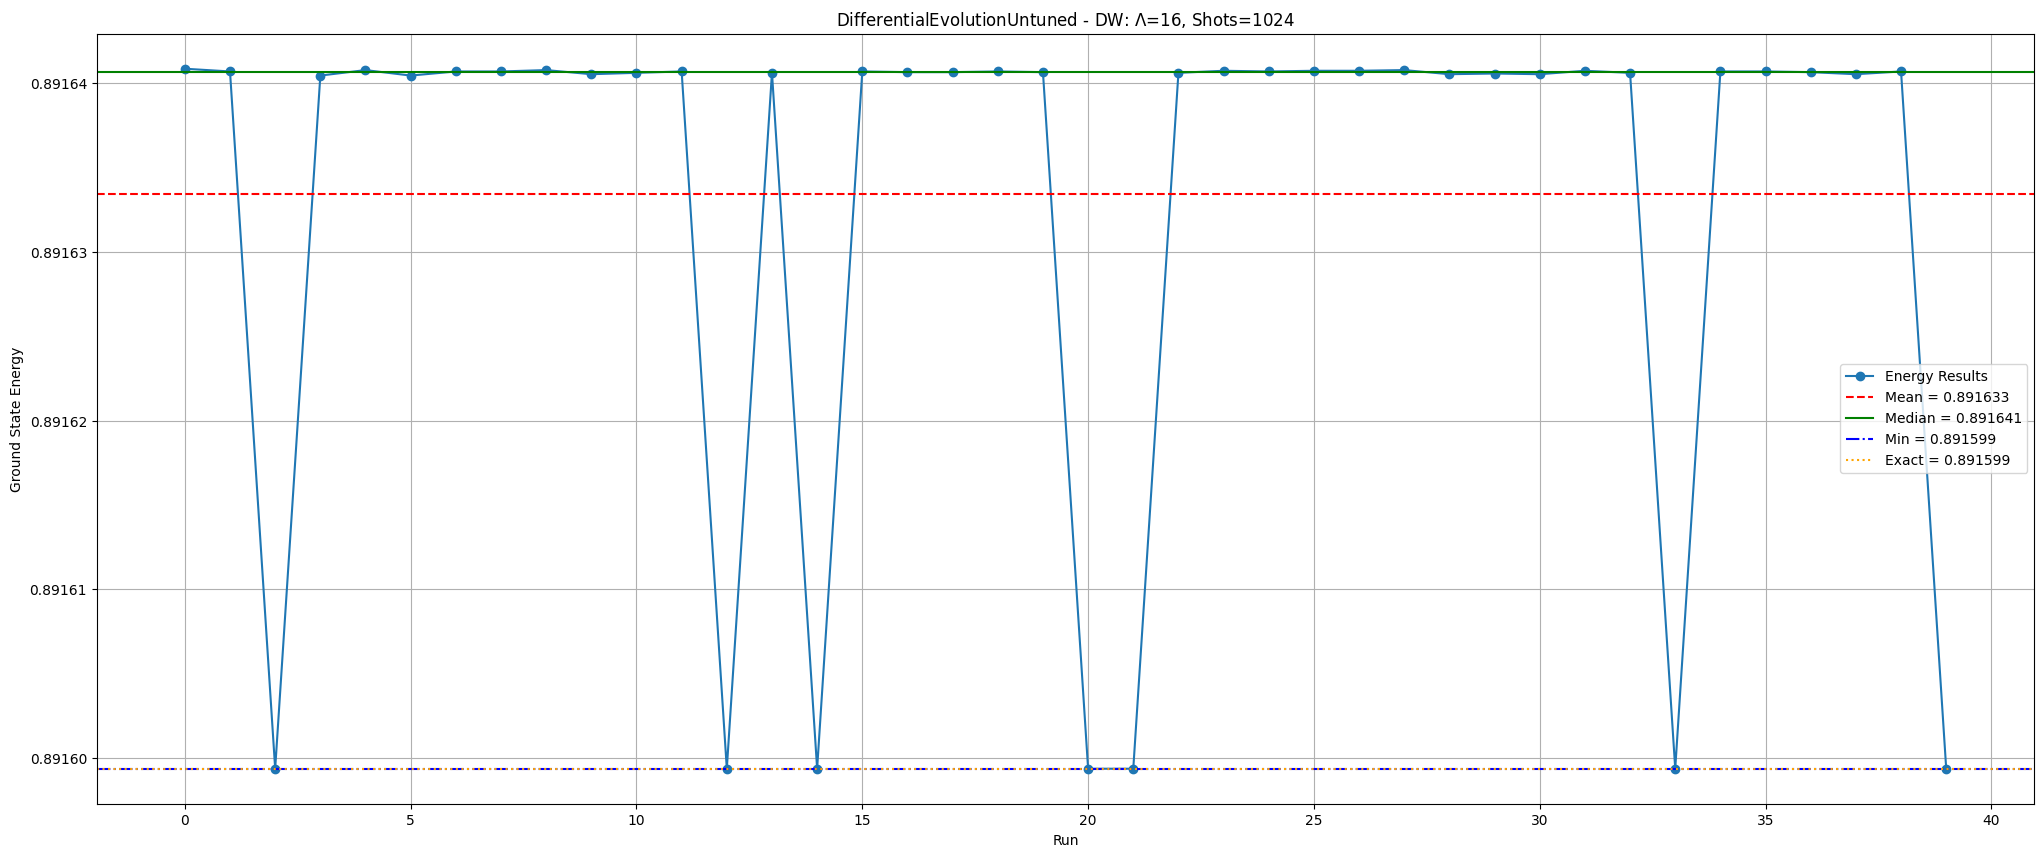

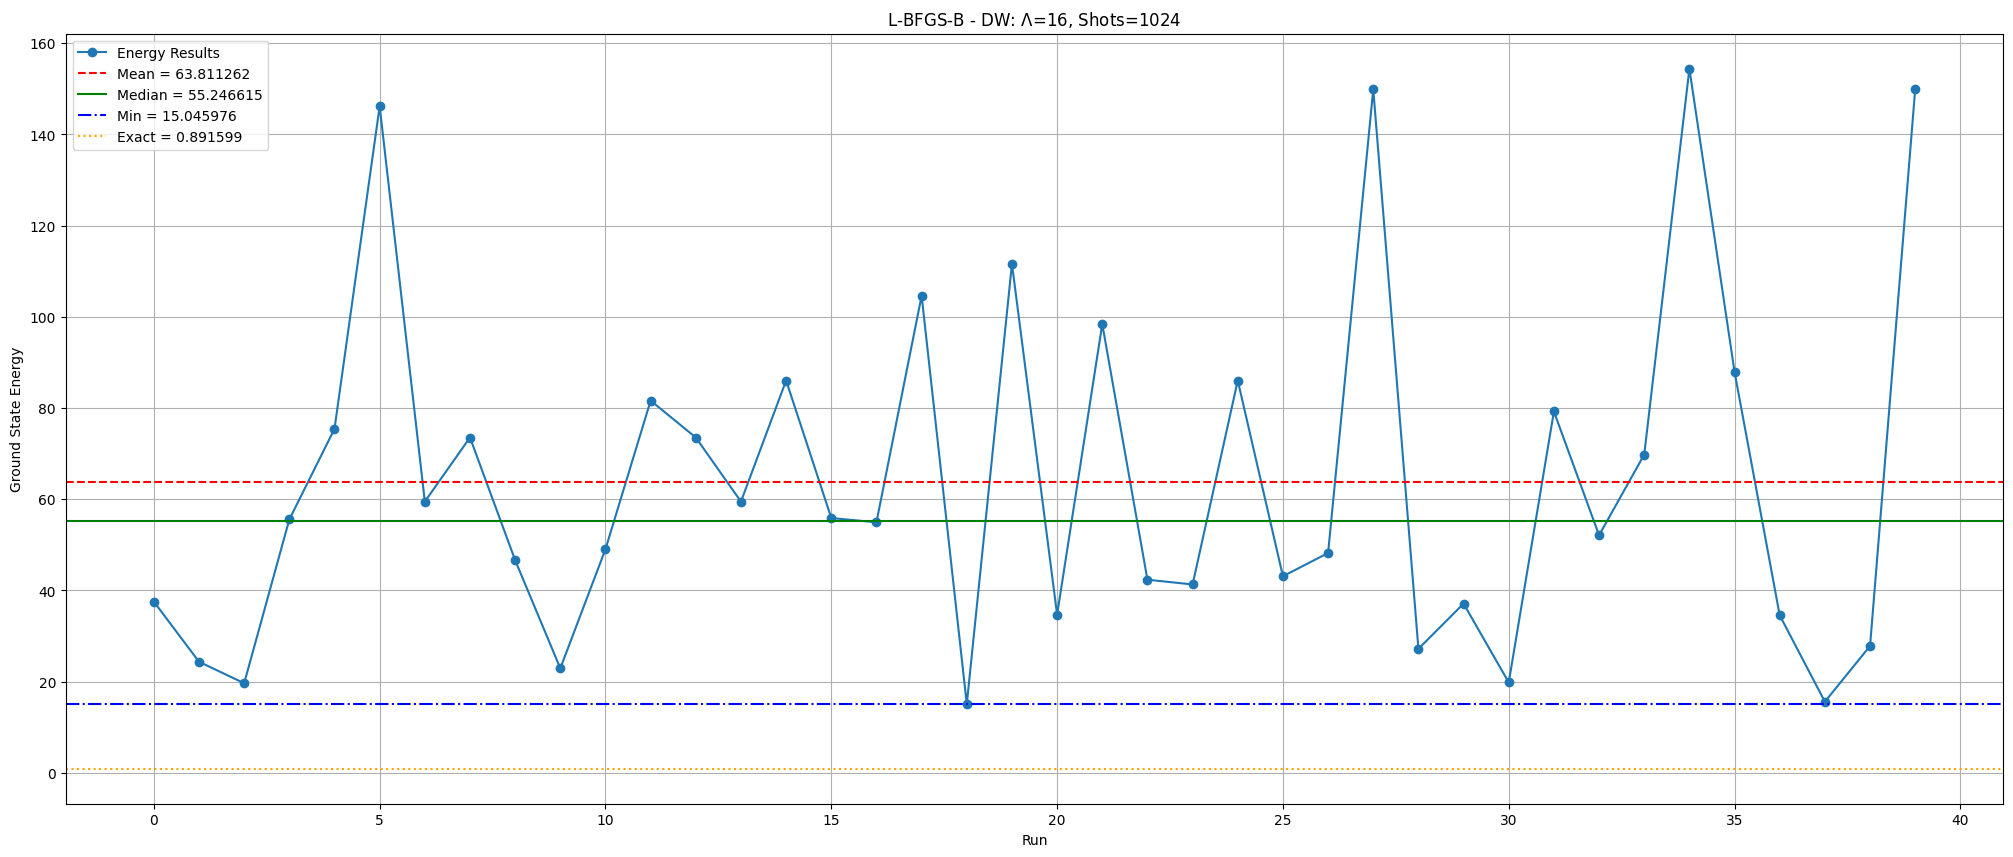

In [9]:
for folder in folders:

    # Save plot
    print(f"Saving plot for {folder}")

    op_data = data[folder]
    results = op_data['results']
    exact = np.min(op_data['exact_eigenvalues'])
    x_values = range(len(results))

    # Calculating statistics
    mean_value = np.mean(results)
    median_value = np.median(results)
    min_value = np.min(results)

    plt.figure(figsize=(25,10))
    plt.plot(x_values, results, marker='o', label='Energy Results')

    # Plot mean, median, min and exact lines
    plt.axhline(y=mean_value, color='r', linestyle='--', label=f'Mean = {mean_value:.6f}')
    plt.axhline(y=median_value, color='g', linestyle='-', label=f'Median = {median_value:.6f}')
    plt.axhline(y=min_value, color='b', linestyle='-.', label=f'Min = {min_value:.6f}')
    plt.axhline(y=exact, color='orange', linestyle=':', label=f'Exact = {exact:.6f}')

    plt.xlabel('Run')
    plt.ylabel('Ground State Energy')
    plt.title(f"{folder} - DW: $\\Lambda$=16, Shots={shots}")
    plt.legend()
    plt.grid(True)
    #plt.show()
    save_path = os.path.join(folder_path, folder, 'DW', shots, 'plot.png')
    plt.savefig(save_path)
    

# Combined

Plotting data for COBYLA
Plotting data for DifferentialEvolutionTuned
Plotting data for DifferentialEvolutionTuned-NoPolish
Plotting data for DifferentialEvolutionUntuned
Plotting data for L-BFGS-B


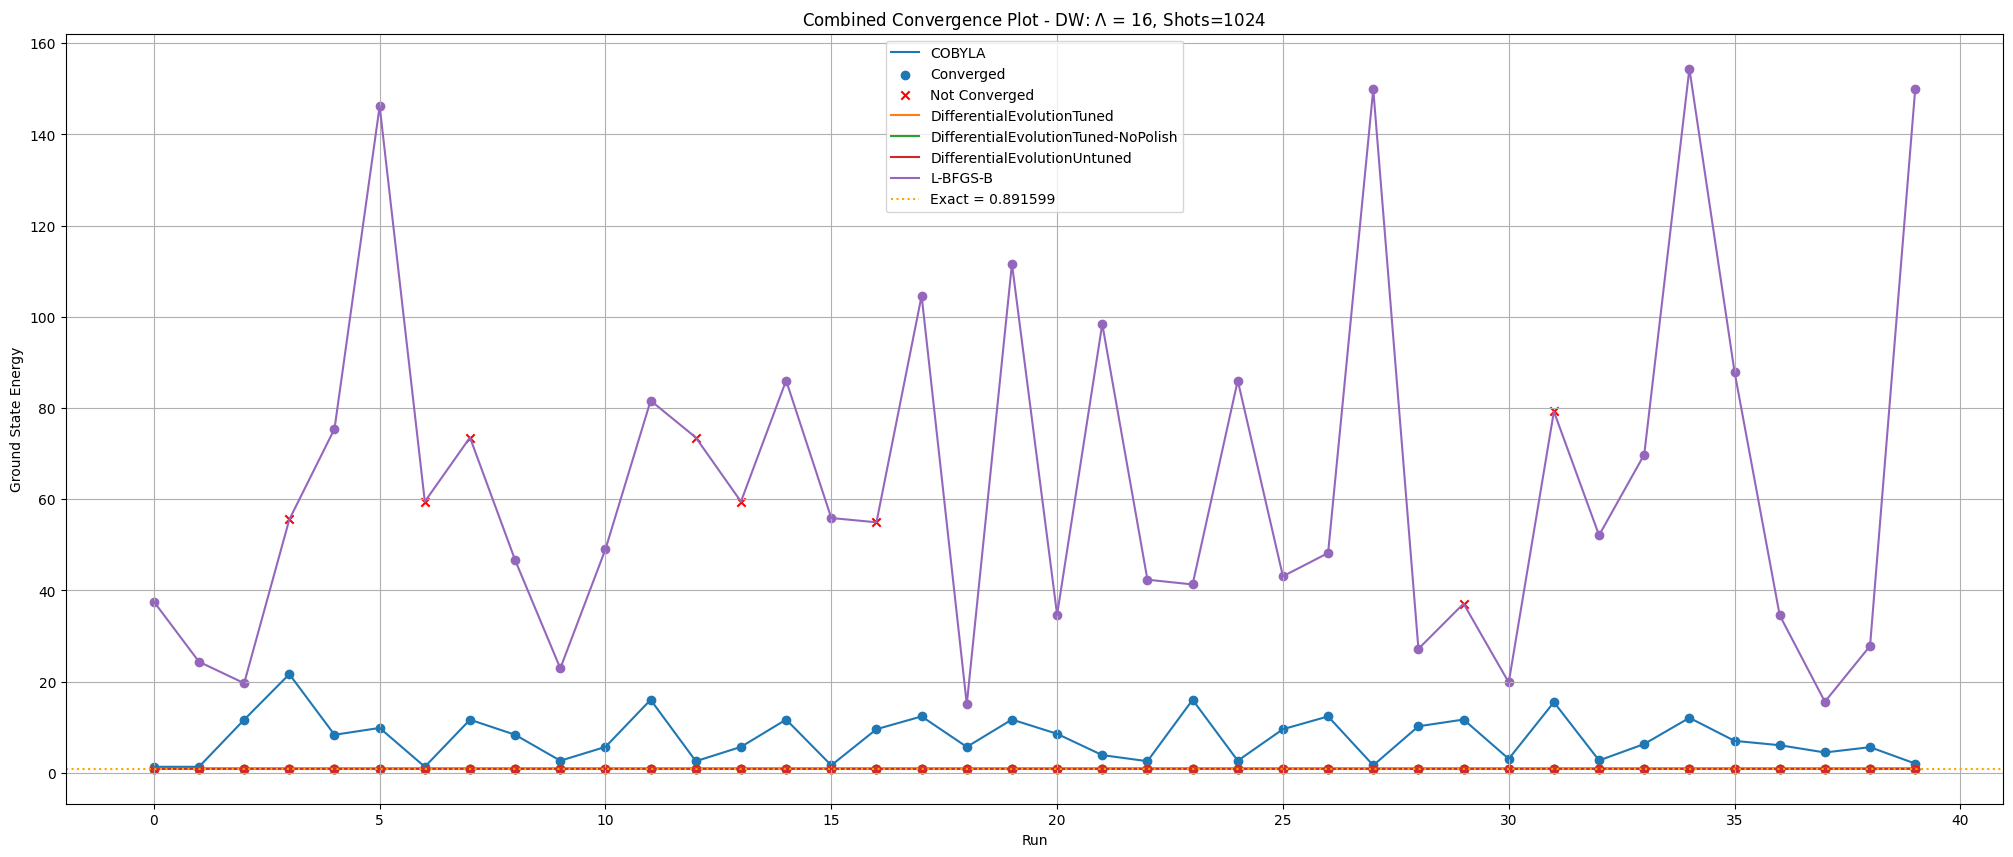

In [10]:
plt.figure(figsize=(25,10))

added_converged = False
added_non_converged = False

for folder in folders:
    print(f"Plotting data for {folder}")
    
    op_data = data[folder]
    results = np.array(op_data['results'])
    exact = np.min(op_data['exact_eigenvalues'])
    x_values = np.arange(len(results))
    converged = np.array(op_data['success'])
    
    min_value = np.min(results)

    plt.plot(x_values, results, label=f'{folder}')
    
    # Plot converged points, adding label only if not done before
    if not added_converged:
        plt.scatter(x_values[converged], results[converged], marker='o', label='Converged')
        added_converged = True
    else:
        plt.scatter(x_values[converged], results[converged], marker='o')
    
    # Plot non-converged points, adding label only if not done before
    if not added_non_converged:
        plt.scatter(x_values[~converged], results[~converged], marker='x', color='r', label='Not Converged')
        added_non_converged = True
    else:
        plt.scatter(x_values[~converged], results[~converged], marker='x', color='r')
    
    
plt.axhline(y=exact, color='orange', linestyle=':', label=f'Exact = {exact:.6f}')

# Add labels and title after the loop
plt.xlabel('Run')
plt.ylabel('Ground State Energy')
plt.title(f"Combined Convergence Plot - DW: $\\Lambda$ = 16, Shots={shots}")
plt.legend()
plt.grid(True)

save_path = os.path.join(folder_path, f'combined_convergence_plot_{shots}.png')
plt.savefig(save_path)
#plt.show()
